In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("BlackFridayData.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
del df['Product_Category_2']
del df['Product_Category_3']
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
for column in df.columns:
    print(column,":",df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [6]:
df['Purchase'].sum()/len(df['Purchase']) 

9333.859852635065

<Axes: ylabel='Ratio'>

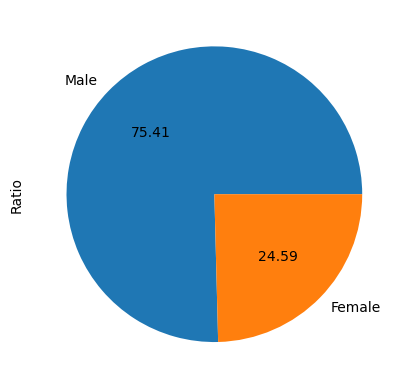

In [7]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data['Ratio'].plot(kind='pie',autopct='%.2f')

<Axes: title={'center': 'Purchase'}, ylabel='Purchase'>

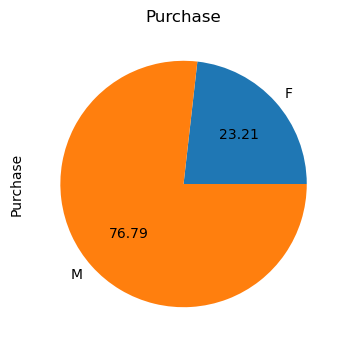

In [8]:
df.groupby('Gender')['Purchase'].sum().plot(kind='pie',title='Purchase',autopct='%.2f',figsize=(4,4))

<Axes: title={'center': 'Amount spent by Age'}, xlabel='Age'>

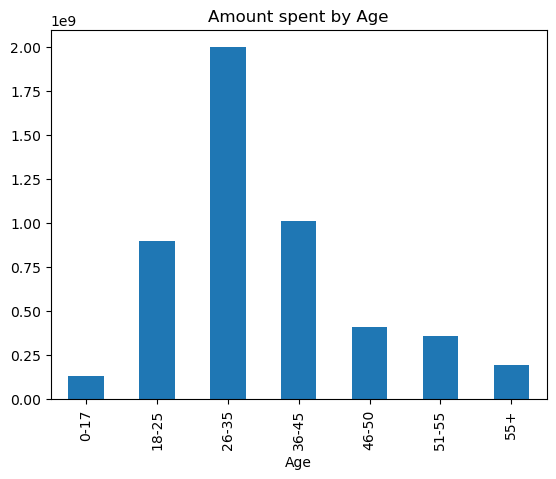

In [9]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar',title='Amount spent by Age')

<Axes: title={'center': 'Purchase distribution by Age'}, xlabel='Age'>

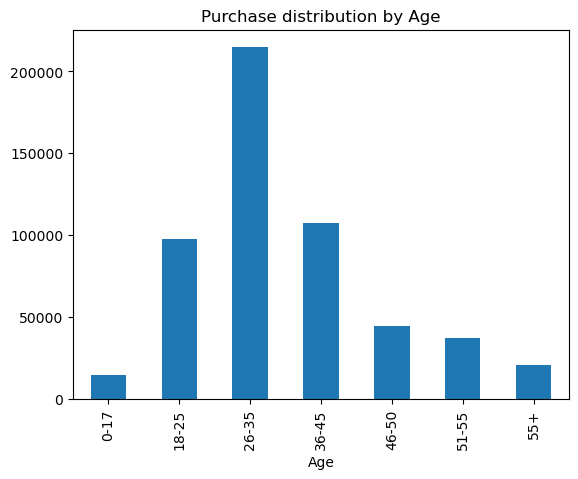

In [10]:
df.groupby('Age')['Purchase'].size().plot(kind='bar',title='Purchase distribution by Age')

<Axes: title={'center': 'Unique products by age'}, xlabel='Age'>

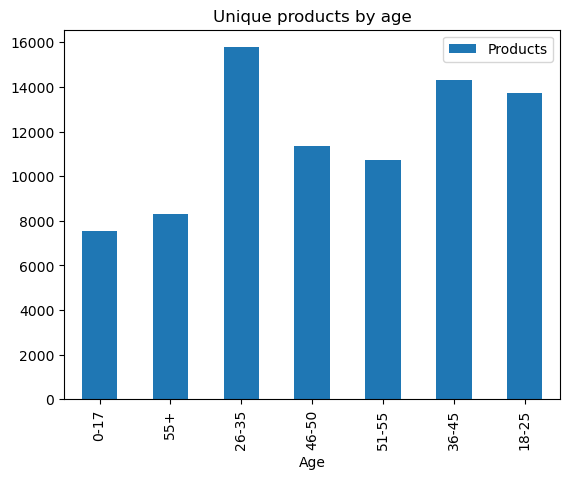

In [11]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Purchase'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Products'])
data.plot(kind='bar',x='Age',title='Unique products by age')

<Axes: title={'center': 'Purchase distribution by Marital Status'}, ylabel='Purchase'>

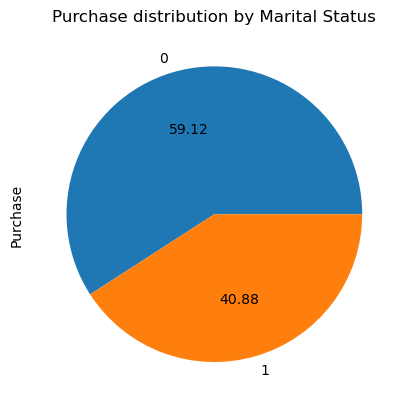

In [12]:
df.groupby('Marital_Status')['Purchase'].size().plot(kind='pie',title='Purchase distribution by Marital Status',autopct='%.2f')

<Axes: xlabel='Age', ylabel='count'>

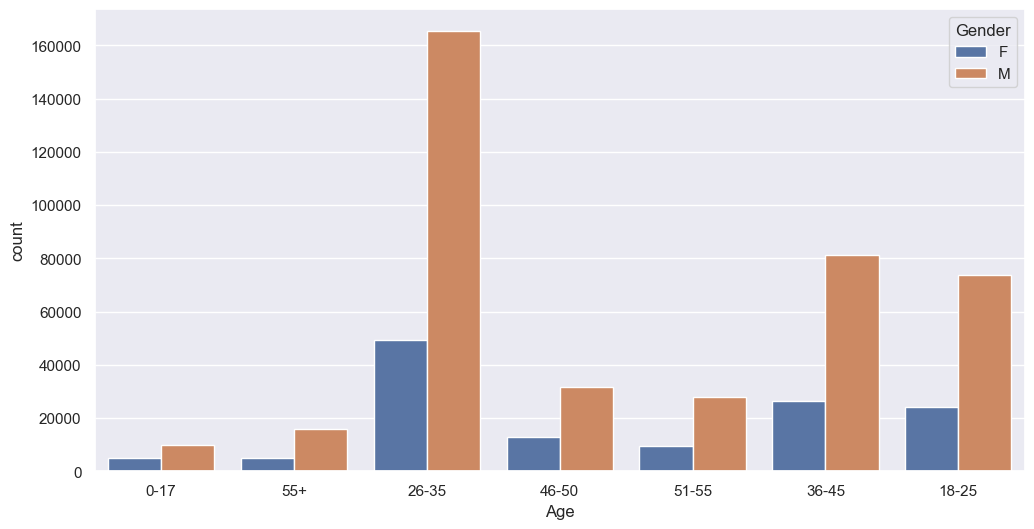

In [13]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Occupation'>

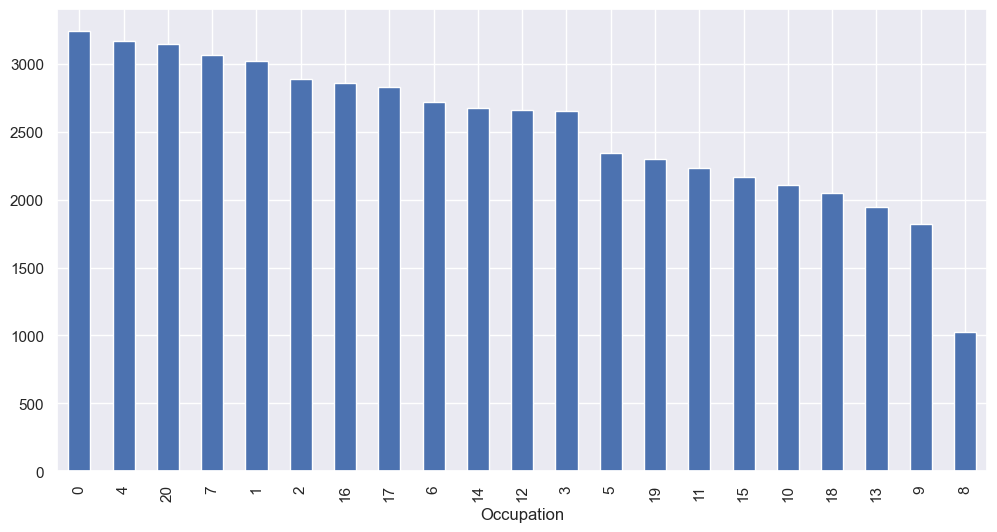

In [20]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

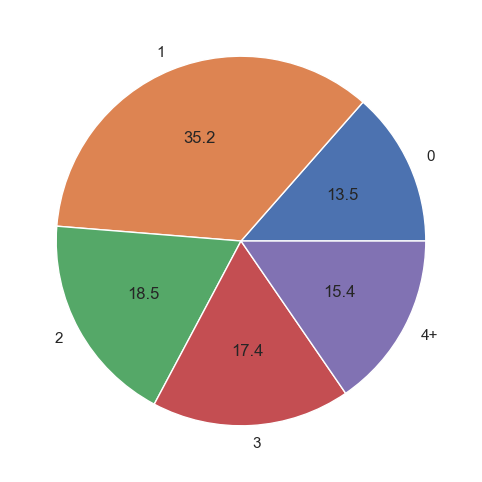

In [23]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%0.1f')

<Axes: xlabel='Product_ID'>

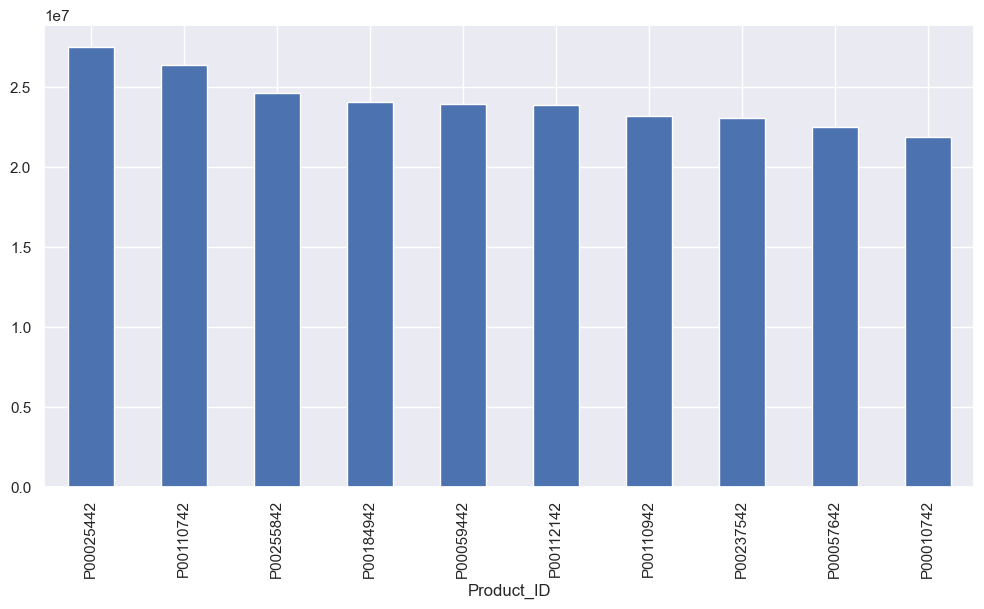

In [26]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind='bar')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [29]:
lst=[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
df['MaritalGender']=lst
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender'>

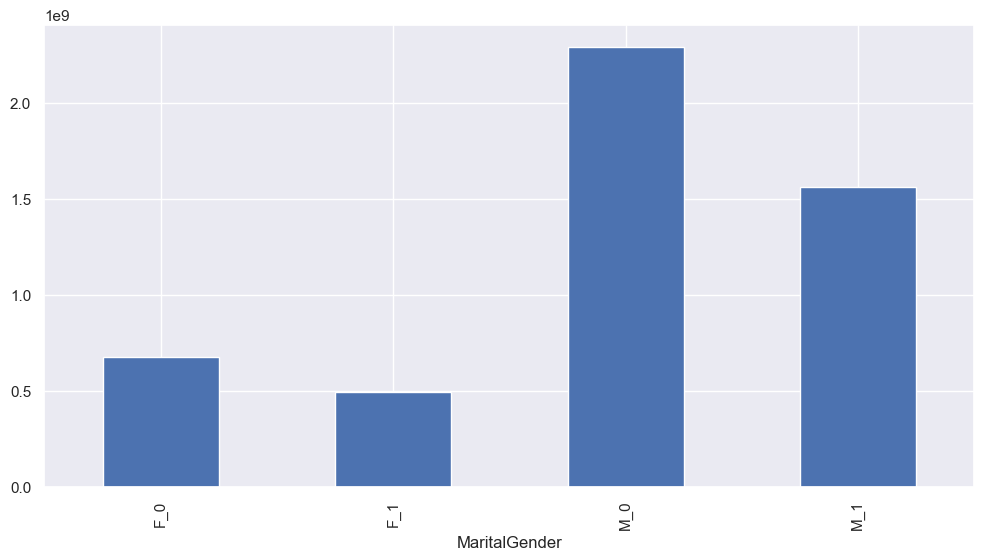

In [33]:
df.groupby('MaritalGender')['Purchase'].sum().plot(kind='bar')